<a href="https://colab.research.google.com/github/rhyuns/class2022Spring/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization: string을 단어 수준으로 단어 단위로 끊는 것

In [1]:
import nltk

nltk는 text와 관련된 library, natural language processing(텍스트처리)용도

In [2]:
# copy a file from github, github에 있는 url을 collab 폴더에 불러오기(read in)
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ") #text 안에 죄와 벌의 모든 글이 들어와 있음, string으로 가져옴
file.close()

In [3]:
# or copy/pase text here: 위에 처럼 url을 불러오거나 그냥 복사, 붙여넣기 해도 됨(read in)
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [4]:
# write out a text file: text라는 variable에 string이 들어있는 것을 file로 만드는 것(write out이라고 함)
file = open("tmp.txt", "w")
file.write(text)
file.close()

In [ ]:
text.split() 
#띄워쓰기를 기준으로 다 쪼개짐, 기본적인 tokenize라고 볼 수 있음
#이 tokenize의 단점은 punctuation이 붙어서 split된다는 점임

In [ ]:
' '.join(text.split()) 
#' '는 space를 list로 만들어 놓은 것, split 해놓은 list를 띄워쓰기를 해서 다시 붙여놓기

In [6]:
from nltk.tokenize import word_tokenize
#punctuation을 따로 tokenize해줌
nltk.download('punkt')
#punctuation에 대한 정의를 다운로드 받은 것
#얘의 단점은 쓸모가 없는 punctuation을 남겨놓는 점
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
words

In [8]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text) #punctuation을 빼줌

In [ ]:
words

### Normalization: 접미사 접두사 등을 분리해서 깔끔하게 만드는 것?
**Stemming** 어간 추출 *대충의 패턴* 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출.


In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words] 
#list comprehension 사용, words에는 위에서 tokenize 해놓은 것
#사전에 없는 단어들이 나옴

['here',
 's',
 'to',
 'the',
 'crazi',
 'one',
 'the',
 'misfit',
 'the',
 'rebel',
 'the',
 'troublemak',
 'the',
 'round',
 'peg',
 'in',
 'the',
 'squar',
 'hole',
 'the',
 'one',
 'who',
 'see',
 'thing',
 'differ',
 'they',
 're',
 'not',
 'fond',
 'of',
 'rule',
 'you',
 'can',
 'quot',
 'them',
 'disagre',
 'with',
 'them',
 'glorifi',
 'or',
 'vilifi',
 'them',
 'but',
 'the',
 'onli',
 'thing',
 'you',
 'can',
 't',
 'do',
 'is',
 'ignor',
 'them',
 'becaus',
 'they',
 'chang',
 'thing',
 'they',
 'push',
 'the',
 'human',
 'race',
 'forward',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'as',
 'the',
 'crazi',
 'one',
 'we',
 'see',
 'geniu',
 'becaus',
 'the',
 'one',
 'who',
 'are',
 'crazi',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'chang',
 'the',
 'world',
 'are',
 'the',
 'one',
 'who',
 'do']

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]
#얘도 위에 있는 것과 다를 바가 없음

In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]
#잘라낸 후 원형으로 복구를 해놓음, 존재하는 단어를 바탕으로 표제어를 사용해서(?) 복구

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['Here',
 's',
 'to',
 'the',
 'crazy',
 'one',
 'the',
 'misfit',
 'the',
 'rebel',
 'the',
 'troublemaker',
 'the',
 'round',
 'peg',
 'in',
 'the',
 'square',
 'hole',
 'The',
 'one',
 'who',
 'see',
 'thing',
 'differently',
 'they',
 're',
 'not',
 'fond',
 'of',
 'rule',
 'You',
 'can',
 'quote',
 'them',
 'disagree',
 'with',
 'them',
 'glorify',
 'or',
 'vilify',
 'them',
 'but',
 'the',
 'only',
 'thing',
 'you',
 'can',
 't',
 'do',
 'is',
 'ignore',
 'them',
 'because',
 'they',
 'change',
 'thing',
 'They',
 'push',
 'the',
 'human',
 'race',
 'forward',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'a',
 'the',
 'crazy',
 'one',
 'we',
 'see',
 'genius',
 'because',
 'the',
 'one',
 'who',
 'are',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'change',
 'the',
 'world',
 'are',
 'the',
 'one',
 'who',
 'do']

### Stopword: 불용어, 대명사 조동사 관사 등 내용이 없고 너무 많이 쓰여서 크게 관심 가질 필요가 없는 부분을 모아 놓은 것

In [12]:
from nltk.corpus import stopwords  
nltk.download('stopwords') #stopwords에는 대명사, 조동사, 관사 등이 정의되어 있음
print(words)
#words는 punctuation까지 제거하여 tokenize한 list임
words = [w for w in words if not w in stopwords.words('english')]
#words에 있는 하나 하나의 단어가 stopwords에 들어있지 않으면 취하라 = stopwords는 빼라
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Here', 's', 'to', 'the', 'crazy', 'ones', 'the', 'misfits', 'the', 'rebels', 'the', 'troublemakers', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', 'The', 'ones', 'who', 'see', 'things', 'differently', 'they', 're', 'not', 'fond', 'of', 'rules', 'You', 'can', 'quote', 'them', 'disagree', 'with', 'them', 'glorify', 'or', 'vilify', 'them', 'but', 'the', 'only', 'thing', 'you', 'can', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', 'They', 'push', 'the', 'human', 'race', 'forward', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', 'we', 'see', 'genius', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', 'are', 'the', 'ones', 'who', 'do']
['Here', 'crazy', 'ones', 'misfits', 'rebels', 'troublemakers', 'round', 'pegs', 'square', 'holes', 'The', 'one

### Collocation(연어 ex.숙어, 같이 나올 확률이 높은 단어)

### Concordance(특정 단어에 대해서 용매가 어떻게 되는지, ex. would가 큰 corpus에서 어떻게 쓰였는지 찾기)

In [13]:
nltk.download('gutenberg')
#gutenberg는 저작권이 없는 text를 무료로 제공해주는 것
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
#gutenberg 안에서 text 하나를 통째로 불러온 것
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [14]:
type(text) #모든 텍스트가 string으로 들어가 있음

str

In [15]:
len(text) #몇 자인지

887071

In [16]:
type(words) #words는 list 형태임

list

In [17]:
len(words) #몇 단어인지

161983

In [18]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2), 단어 두개짜리의 연어를 20개만 보여달라?

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [19]:
nltk.Text(words).collocations(num=20, window_size=2)

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [20]:
nltk.Text(words).concordance('Emma', 79, 10)
#corpus 전체에서 Emma라는 단어가 존재하는 context를 79자로 10개만 보여달라

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


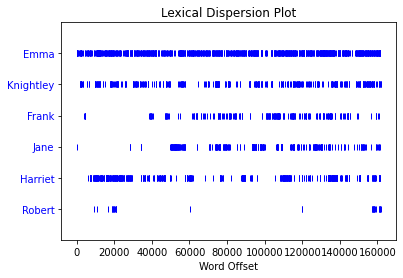

In [21]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
#corpus 전체에 있는 16만개의 단어 중 괄호에 넣은 단어가 언제 등장하는지, 어떻게 분포되어 있는지
#Emma는 계속 등장하고 있고 Robert는 등장 빈도가 낮은 것임 

In [22]:
# Distributional similarity: 분포상으로 비슷한 것이 무엇인가
# find other words which appear in the same contexts as the specified word; 비슷한 맥락에서 나오는 단어 
# list most similar words first. 가장 비슷한 것부터 나열하라
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [23]:
# Find contexts where the specified words appear; list most frequent common contexts first.
#괄호 안에 specified된 단어 두개가 공통으로 나타나는 context 중 가장 비슷한 것부터 나열하라
nltk.Text(words).common_contexts(["Emma", "she"])
#결과를 분석하자면 but과 was 사이에 Emma와 She가 나타나기 쉽다는 것임

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency(어떤 단어가 많이 쓰였는지, 이를 통해 문서에 대한 특징을 파악하기 쉬움) distribution, Frequency plot

In [24]:
fd = nltk.FreqDist(words).most_common(20) #어떤 단어가 가장 자주 나오는가, 높은 순으로 20개
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

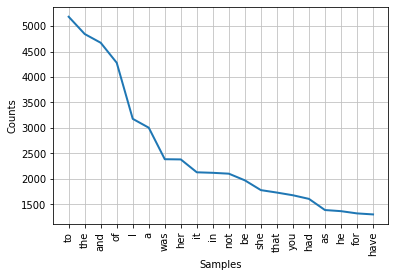

In [25]:
nltk.Text(words).plot(20) #위와 똑같은 정보를 이미지로 나타내줌

### Dictionary: 사전을 통으로 불러와서 쓸 수도 있음

In [26]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1] #en은 영어라는 뜻, [-20:-1]은 list 중 마지막 20개만 나타내기


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [27]:
len(nltk.corpus.words.words('en')) #사전에 몇 자가 들어있는지

235886

### Extract information (pos tag, named entity)


#### **POS(Part of Speech, 품사) tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [28]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent) #먼저 tokenize해줌

In [29]:
words

['I',
 'am',
 'Jhon',
 'from',
 'America',
 'and',
 'would',
 'like',
 'to',
 'go',
 'to',
 'Starbuck']

In [30]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words) #tokenize한 것에 품사 이름을 붙여라

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [31]:
pos

[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [32]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)
# 품사 외에도 위에 적힌 정보도 분석해낼 수 있음 기관, 사람, 위치 , 날짜, 시간 등

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


### Wordcloud: frequency(단어 사용 빈도)를 기반으로 해서 비주얼화 해주는 것

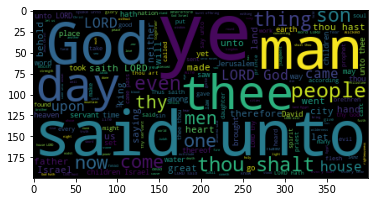

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc) #성경 전체에서 자주 나오는 단어일 수록 크게 나옴

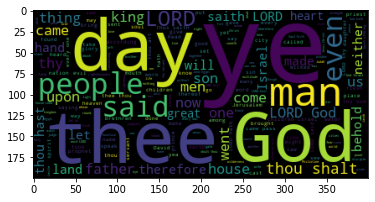

In [36]:
stopwords = set(STOPWORDS) 
stopwords.add('unto') #stopwords에 unto를 추가
wc = WordCloud(stopwords = stopwords).generate(text) #unto 포함 stopwords를 빼고 비주얼화 하기
plt.imshow(wc)
#0504 여기까지 했음

### Regular expression: 규칙을 표현하는 것, 어떤 text를 수정하거나 검색하고 싶을 때 규칙을 통해 찾아냄(?)

In [ ]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])